In [1]:
import pandas as pd
import re

In [2]:
df_radiology = pd.read_csv("radiology.csv")

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df_radiology.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,"EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION: ___ with new onset ascites // eval for infection\n\nTECHNIQUE: Chest PA and lateral\n\nCOMPARISON: None.\n\nFINDINGS: \n\nThere is no focal consolidation, pleural effusion or pneumothorax. Bilateral\nnodular opacities that most likely represent nipple shadows. The\ncardiomediastinal silhouette is normal. Clips project over the left lung,\npotentially within the breast. The imaged upper abdomen is unremarkable.\nChronic deformity of the posterior left sixth and seventh ribs are noted.\n\nIMPRESSION: \n\nNo acute cardiopulmonary process.\n"
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN)\n\nINDICATION: ___ year-old female with cirrhosis, jaundice.\n\nTECHNIQUE: Grey scale and color Doppler ultrasound images of the abdomen were\nobtained.\n\nCOMPARISON: None.\n\nFINDINGS: \n\nLIVER: The liver is coarsened and nodular in echotexture. There is no focal\nliver mass. Main portal vein and its major branches are patent with normal\nhepatopetal flow. The main hepatic artery shows normal arterial waveform. \nThere is a small amount of ascites.\n\nBILE DUCTS: There is no intrahepatic biliary dilation. The CBD measures 4 mm.\n\nGALLBLADDER: The gallbladder is contracted with a shadowing gallstone.\n\nPANCREAS: Imaged portion of the pancreas appears within normal limits, without\nmasses or pancreatic ductal dilation, with portions of the pancreatic tail\nobscured by overlying bowel gas.\n\nSPLEEN: Normal echogenicity, measuring 13.5 cm.\n\nKIDNEYS: The right kidney measures 12.1 cm. The left kidney measures 13.4 cm.\nNormal cortical echogenicity and corticomedullary differentiation is seen\nbilaterally.\nRETROPERITONEUM: Visualized portions of aorta and IVC are within normal\nlimits.\n\nIMPRESSION: \n\n1. Nodular appearance of the liver compatible with cirrhosis. Signs of portal\nhypertension including small amount of ascites and splenomegaly.\n2. Cholelithiasis.\n3. Patent portal veins with normal hepatopetal flow.\n"
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD,\nbioplar, PTSD, presented from OSH ED with worsening abd distension over past\nweek. // SBP\n\nTECHNIQUE: Ultrasound guided diagnostic and therapeutic paracentesis\n\nCOMPARISON: Abdominal ultrasound ___\n\nFINDINGS: \n\nLimited grayscale ultrasound imaging of the abdomen demonstrated\nmoderateascites. A suitable target in the deepest pocket in the right lower\nquadrant was selected for paracentesis.\n\nPROCEDURE: The procedure, risks, benefits and alternatives were discussed\nwith the patient and written informed consent was obtained.\n\nA preprocedure time-out was performed discussing the planned procedure,\nconfirming the patient's identity with 3 identifiers, and reviewing a\nchecklist per ___ protocol.\n\nUnder ultrasound guidance, an entrance site was selected and the skin was\nprepped and draped in the usual sterile fashion. 1% lidocaine was instilled\nfor local anesthesia.\n\nA 5 ___ catheter was advanced into the largest fluid pocket in the right\nlower quadrant and 1.5 L of serosanguinous fluid was removed.\n\nThe patient tolerated the procedure well without immediate complication.\nEstimated blood loss was minimal. A sample of the fluid was sent to the lab\nas requested.\n\nDr. ___ attending radiologist, was present throughout the critical\nportions of the procedure.\n\nIMPRESSION: \n\nSuccessful uncomplicated ultrasound guided diagnostic and therapeutic\nparacentesis yielding 1.5 L of serosanguineous fluid from the right lower\nquadrant. Sample was sent to the lab as requested.\n"
3,10000032-RR-18,10000032,NaN,RR,18,2180-06-03 12:46:00,2180-06-03 14:01:00,"EXAMINATION: Ultraso

In [5]:
# looking for missing values
missing_values = df_radiology.isnull()
missing_counts = missing_values.sum()
missing_counts

note_id             0
subject_id          0
hadm_id       1176597
note_type           0
note_seq            0
charttime           0
storetime           0
text                0
dtype: int64

In [6]:
# removing missing rows
df_radiology_clean = df_radiology.dropna()

In [7]:
df_radiology_clean

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,"EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION: ___ with new onset ascites // eval for infection\n\nTECHNIQUE: Chest PA and lateral\n\nCOMPARISON: None.\n\nFINDINGS: \n\nThere is no focal consolidation, pleural effusion or pneumothorax. Bilateral\nnodular opacities that most likely represent nipple shadows. The\ncardiomediastinal silhouette is normal. Clips project over the left lung,\npotentially within the breast. The imaged upper abdomen is unremarkable.\nChronic deformity of the posterior left sixth and seventh ribs are noted.\n\nIMPRESSION: \n\nNo acute cardiopulmonary process.\n"
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN)\n\nINDICATION: ___ year-old female with cirrhosis, jaundice.\n\nTECHNIQUE: Grey scale and color Doppler ultrasound images of the abdomen were\nobtained.\n\nCOMPARISON: None.\n\nFINDINGS: \n\nLIVER: The liver is coarsened and nodular in echotexture. There is no focal\nliver mass. Main portal vein and its major branches are patent with normal\nhepatopetal flow. The main hepatic artery shows normal arterial waveform. \nThere is a small amount of ascites.\n\nBILE DUCTS: There is no intrahepatic biliary dilation. The CBD measures 4 mm.\n\nGALLBLADDER: The gallbladder is contracted with a shadowing gallstone.\n\nPANCREAS: Imaged portion of the pancreas appears within normal limits, without\nmasses or pancreatic ductal dilation, with portions of the pancreatic tail\nobscured by overlying bowel gas.\n\nSPLEEN: Normal echogenicity, measuring 13.5 cm.\n\nKIDNEYS: The right kidney measures 12.1 cm. The left kidney measures 13.4 cm.\nNormal cortical echogenicity and corticomedullary differentiation is seen\nbilaterally.\nRETROPERITONEUM: Visualized portions of aorta and IVC are within normal\nlimits.\n\nIMPRESSION: \n\n1. Nodular appearance of the liver compatible with cirrhosis. Signs of portal\nhypertension including small amount of ascites and splenomegaly.\n2. Cholelithiasis.\n3. Patent portal veins with normal hepatopetal flow.\n"
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD,\nbioplar, PTSD, presented from OSH ED with worsening abd distension over past\nweek. // SBP\n\nTECHNIQUE: Ultrasound guided diagnostic and therapeutic paracentesis\n\nCOMPARISON: Abdominal ultrasound ___\n\nFINDINGS: \n\nLimited grayscale ultrasound imaging of the abdomen demonstrated\nmoderateascites. A suitable target in the deepest pocket in the right lower\nquadrant was selected for paracentesis.\n\nPROCEDURE: The procedure, risks, benefits and alternatives were discussed\nwith the patient and written informed consent was obtained.\n\nA preprocedure time-out was performed discussing the planned procedure,\nconfirming the patient's identity with 3 identifiers, and reviewing a\nchecklist per ___ protocol.\n\nUnder ultrasound guidance, an entrance site was selected and the skin was\nprepped and draped in the usual sterile fashion. 1% lidocaine was instilled\nfor local anesthesia.\n\nA 5 ___ catheter was advanced into the largest fluid pocket in the right\nlower quadrant and 1.5 L of serosanguinous fluid was removed.\n\nThe patient tolerated the procedure well without immediate complication.\nEstimated blood loss was minimal. A sample of the fluid was sent to the lab\nas requested.\n\nDr. ___ attending radiologist, was present throughout the critical\nportions of the procedure.\n\nIMPRESSION: \n\nSuccessful uncomplicated ultrasound guided diagnostic and therapeutic\nparacentesis yielding 1.5 L of serosanguineous fluid from the right lower\nquadrant. Sample was sent to the lab as requested.\n"
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,"EXAMINATION: 

In [8]:
print(df_radiology_clean.shape)

(1144758, 8)


In [9]:
# taking a subset of data
subset = df_radiology_clean.iloc[:5000]

In [10]:
subset.shape

(5000, 8)

In [11]:
subset.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,"EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION: ___ with new onset ascites // eval for infection\n\nTECHNIQUE: Chest PA and lateral\n\nCOMPARISON: None.\n\nFINDINGS: \n\nThere is no focal consolidation, pleural effusion or pneumothorax. Bilateral\nnodular opacities that most likely represent nipple shadows. The\ncardiomediastinal silhouette is normal. Clips project over the left lung,\npotentially within the breast. The imaged upper abdomen is unremarkable.\nChronic deformity of the posterior left sixth and seventh ribs are noted.\n\nIMPRESSION: \n\nNo acute cardiopulmonary process.\n"
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN)\n\nINDICATION: ___ year-old female with cirrhosis, jaundice.\n\nTECHNIQUE: Grey scale and color Doppler ultrasound images of the abdomen were\nobtained.\n\nCOMPARISON: None.\n\nFINDINGS: \n\nLIVER: The liver is coarsened and nodular in echotexture. There is no focal\nliver mass. Main portal vein and its major branches are patent with normal\nhepatopetal flow. The main hepatic artery shows normal arterial waveform. \nThere is a small amount of ascites.\n\nBILE DUCTS: There is no intrahepatic biliary dilation. The CBD measures 4 mm.\n\nGALLBLADDER: The gallbladder is contracted with a shadowing gallstone.\n\nPANCREAS: Imaged portion of the pancreas appears within normal limits, without\nmasses or pancreatic ductal dilation, with portions of the pancreatic tail\nobscured by overlying bowel gas.\n\nSPLEEN: Normal echogenicity, measuring 13.5 cm.\n\nKIDNEYS: The right kidney measures 12.1 cm. The left kidney measures 13.4 cm.\nNormal cortical echogenicity and corticomedullary differentiation is seen\nbilaterally.\nRETROPERITONEUM: Visualized portions of aorta and IVC are within normal\nlimits.\n\nIMPRESSION: \n\n1. Nodular appearance of the liver compatible with cirrhosis. Signs of portal\nhypertension including small amount of ascites and splenomegaly.\n2. Cholelithiasis.\n3. Patent portal veins with normal hepatopetal flow.\n"
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD,\nbioplar, PTSD, presented from OSH ED with worsening abd distension over past\nweek. // SBP\n\nTECHNIQUE: Ultrasound guided diagnostic and therapeutic paracentesis\n\nCOMPARISON: Abdominal ultrasound ___\n\nFINDINGS: \n\nLimited grayscale ultrasound imaging of the abdomen demonstrated\nmoderateascites. A suitable target in the deepest pocket in the right lower\nquadrant was selected for paracentesis.\n\nPROCEDURE: The procedure, risks, benefits and alternatives were discussed\nwith the patient and written informed consent was obtained.\n\nA preprocedure time-out was performed discussing the planned procedure,\nconfirming the patient's identity with 3 identifiers, and reviewing a\nchecklist per ___ protocol.\n\nUnder ultrasound guidance, an entrance site was selected and the skin was\nprepped and draped in the usual sterile fashion. 1% lidocaine was instilled\nfor local anesthesia.\n\nA 5 ___ catheter was advanced into the largest fluid pocket in the right\nlower quadrant and 1.5 L of serosanguinous fluid was removed.\n\nThe patient tolerated the procedure well without immediate complication.\nEstimated blood loss was minimal. A sample of the fluid was sent to the lab\nas requested.\n\nDr. ___ attending radiologist, was present throughout the critical\nportions of the procedure.\n\nIMPRESSION: \n\nSuccessful uncomplicated ultrasound guided diagnostic and therapeutic\nparacentesis yielding 1.5 L of serosanguineous fluid from the right lower\nquadrant. Sample was sent to the lab as requested.\n"
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,"EXAMINATION: 

In [12]:
# replacing all occurrences of "\n" with " " 
subset.loc[:, "text"] = subset["text"].str.replace("\n", " ")
subset.head(5)

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,"EXAMINATION: CHEST (PA AND LAT) INDICATION: ___ with new onset ascites // eval for infection TECHNIQUE: Chest PA and lateral COMPARISON: None. FINDINGS: There is no focal consolidation, pleural effusion or pneumothorax. Bilateral nodular opacities that most likely represent nipple shadows. The cardiomediastinal silhouette is normal. Clips project over the left lung, potentially within the breast. The imaged upper abdomen is unremarkable. Chronic deformity of the posterior left sixth and seventh ribs are noted. IMPRESSION: No acute cardiopulmonary process."
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN) INDICATION: ___ year-old female with cirrhosis, jaundice. TECHNIQUE: Grey scale and color Doppler ultrasound images of the abdomen were obtained. COMPARISON: None. FINDINGS: LIVER: The liver is coarsened and nodular in echotexture. There is no focal liver mass. Main portal vein and its major branches are patent with normal hepatopetal flow. The main hepatic artery shows normal arterial waveform. There is a small amount of ascites. BILE DUCTS: There is no intrahepatic biliary dilation. The CBD measures 4 mm. GALLBLADDER: The gallbladder is contracted with a shadowing gallstone. PANCREAS: Imaged portion of the pancreas appears within normal limits, without masses or pancreatic ductal dilation, with portions of the pancreatic tail obscured by overlying bowel gas. SPLEEN: Normal echogenicity, measuring 13.5 cm. KIDNEYS: The right kidney measures 12.1 cm. The left kidney measures 13.4 cm. Normal cortical echogenicity and corticomedullary differentiation is seen bilaterally. RETROPERITONEUM: Visualized portions of aorta and IVC are within normal limits. IMPRESSION: 1. Nodular appearance of the liver compatible with cirrhosis. Signs of portal hypertension including small amount of ascites and splenomegaly. 2. Cholelithiasis. 3. Patent portal veins with normal hepatopetal flow."
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, bioplar, PTSD, presented from OSH ED with worsening abd distension over past week. // SBP TECHNIQUE: Ultrasound guided diagnostic and therapeutic paracentesis COMPARISON: Abdominal ultrasound ___ FINDINGS: Limited grayscale ultrasound imaging of the abdomen demonstrated moderateascites. A suitable target in the deepest pocket in the right lower quadrant was selected for paracentesis. PROCEDURE: The procedure, risks, benefits and alternatives were discussed with the patient and written informed consent was obtained. A preprocedure time-out was performed discussing the planned procedure, confirming the patient's identity with 3 identifiers, and reviewing a checklist per ___ protocol. Under ultrasound guidance, an entrance site was selected and the skin was prepped and draped in the usual sterile fashion. 1% lidocaine was instilled for local anesthesia. A 5 ___ catheter was advanced into the largest fluid pocket in the right lower quadrant and 1.5 L of serosanguinous fluid was removed. The patient tolerated the procedure well without immediate complication. Estimated blood loss was minimal. A sample of the fluid was sent to the lab as requested. Dr. ___ attending radiologist, was present throughout the critical portions of the procedure. IMPRESSION: Successful uncomplicated ultrasound guided diagnostic and therapeutic paracentesis yielding 1.5 L of serosanguineous fluid from the right lower quadrant. Sample was sent to the lab as requested."
6,10000032-RR-22,10000032,22841357.0,RR,22,2180-06-26 17:15:00,2180-06-26 19:28:00,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN) INDICATION: History: ___ with cirrhosis, increased abdominal pain TECHNIQUE: Grey scale and color D

In [13]:
text_subset = subset[["text"]]
text_subset.head(5)

,text
0,"EXAMINATION: CHEST (PA AND LAT) INDICATION: ___ with new onset ascites // eval for infection TECHNIQUE: Chest PA and lateral COMPARISON: None. FINDINGS: There is no focal consolidation, pleural effusion or pneumothorax. Bilateral nodular opacities that most likely represent nipple shadows. The cardiomediastinal silhouette is normal. Clips project over the left lung, potentially within the breast. The imaged upper abdomen is unremarkable. Chronic deformity of the posterior left sixth and seventh ribs are noted. IMPRESSION: No acute cardiopulmonary process."
1,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN) INDICATION: ___ year-old female with cirrhosis, jaundice. TECHNIQUE: Grey scale and color Doppler ultrasound images of the abdomen were obtained. COMPARISON: None. FINDINGS: LIVER: The liver is coarsened and nodular in echotexture. There is no focal liver mass. Main portal vein and its major branches are patent with normal hepatopetal flow. The main hepatic artery shows normal arterial waveform. There is a small amount of ascites. BILE DUCTS: There is no intrahepatic biliary dilation. The CBD measures 4 mm. GALLBLADDER: The gallbladder is contracted with a shadowing gallstone. PANCREAS: Imaged portion of the pancreas appears within normal limits, without masses or pancreatic ductal dilation, with portions of the pancreatic tail obscured by overlying bowel gas. SPLEEN: Normal echogenicity, measuring 13.5 cm. KIDNEYS: The right kidney measures 12.1 cm. The left kidney measures 13.4 cm. Normal cortical echogenicity and corticomedullary differentiation is seen bilaterally. RETROPERITONEUM: Visualized portions of aorta and IVC are within normal limits. IMPRESSION: 1. Nodular appearance of the liver compatible with cirrhosis. Signs of portal hypertension including small amount of ascites and splenomegaly. 2. Cholelithiasis. 3. Patent portal veins with normal hepatopetal flow."
2,"INDICATION: ___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, bioplar, PTSD, presented from OSH ED with worsening abd distension over past week. // SBP TECHNIQUE: Ultrasound guided diagnostic and therapeutic paracentesis COMPARISON: Abdominal ultrasound ___ FINDINGS: Limited grayscale ultrasound imaging of the abdomen demonstrated moderateascites. A suitable target in the deepest pocket in the right lower quadrant was selected for paracentesis. PROCEDURE: The procedure, risks, benefits and alternatives were discussed with the patient and written informed consent was obtained. A preprocedure time-out was performed discussing the planned procedure, confirming the patient's identity with 3 identifiers, and reviewing a checklist per ___ protocol. Under ultrasound guidance, an entrance site was selected and the skin was prepped and draped in the usual sterile fashion. 1% lidocaine was instilled for local anesthesia. A 5 ___ catheter was advanced into the largest fluid pocket in the right lower quadrant and 1.5 L of serosanguinous fluid was removed. The patient tolerated the procedure well without immediate complication. Estimated blood loss was minimal. A sample of the fluid was sent to the lab as requested. Dr. ___ attending radiologist, was present throughout the critical portions of the procedure. IMPRESSION: Successful uncomplicated ultrasound guided diagnostic and therapeutic paracentesis yielding 1.5 L of serosanguineous fluid from the right lower quadrant. Sample was sent to the lab as requested."
6,"EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ORGAN) INDICATION: History: ___ with cirrhosis, increased abdominal pain TECHNIQUE: Grey scale and color Doppler ultrasound images of the right upper quadrant were obtained. COMPARISON: Abdominal ultrasound from ___ FINDINGS: The liver is extremely course and nodular in echotexture similar to the prior examination consistent with a history of cirrhosis. Parenchymal heterogeneity limits detection focal lesions. Note is made of a dominant nodule measuring 3.3 x 2.7 cm exerting mass effect on t

In [14]:
# importing tokenizer lib
import nltk
from nltk.corpus import stopwords

# downloading Punkt tokenizer 
nltk.download("punkt")
nltk.download("stopwords")

# removing stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words("english")]
    return " ".join(filtered_words)

text_subset.loc[:, "text"] = text_subset["text"].apply(remove_stopwords)


[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from nltk import word_tokenize

# convert all letters to lowercase
text_subset.loc[:, "text"] = text_subset["text"].str.lower()
# remove all occurrences of ___ blnk thing
text_subset.loc[:, "text"] = text_subset["text"].str.replace("___", "")
text_subset.head(5)

,text
0,"examination: chest (pa lat) indication: new onset ascites // eval infection technique: chest pa lateral comparison: none. findings: focal consolidation, pleural effusion pneumothorax. bilateral nodular opacities likely represent nipple shadows. cardiomediastinal silhouette normal. clips project left lung, potentially within breast. imaged upper abdomen unremarkable. chronic deformity posterior left sixth seventh ribs noted. impression: acute cardiopulmonary process."
1,"examination: liver gallbladder us (single organ) indication: year-old female cirrhosis, jaundice. technique: grey scale color doppler ultrasound images abdomen obtained. comparison: none. findings: liver: liver coarsened nodular echotexture. focal liver mass. main portal vein major branches patent normal hepatopetal flow. main hepatic artery shows normal arterial waveform. small amount ascites. bile ducts: intrahepatic biliary dilation. cbd measures 4 mm. gallbladder: gallbladder contracted shadowing gallstone. pancreas: imaged portion pancreas appears within normal limits, without masses pancreatic ductal dilation, portions pancreatic tail obscured overlying bowel gas. spleen: normal echogenicity, measuring 13.5 cm. kidneys: right kidney measures 12.1 cm. left kidney measures 13.4 cm. normal cortical echogenicity corticomedullary differentiation seen bilaterally. retroperitoneum: visualized portions aorta ivc within normal limits. impression: 1. nodular appearance liver compatible cirrhosis. signs portal hypertension including small amount ascites splenomegaly. 2. cholelithiasis. 3. patent portal veins normal hepatopetal flow."
2,"indication: hcv cirrhosis c/b ascites, hiv art, h/o ivdu, copd, bioplar, ptsd, presented osh ed worsening abd distension past week. // sbp technique: ultrasound guided diagnostic therapeutic paracentesis comparison: abdominal ultrasound findings: limited grayscale ultrasound imaging abdomen demonstrated moderateascites. suitable target deepest pocket right lower quadrant selected paracentesis. procedure: procedure, risks, benefits alternatives discussed patient written informed consent obtained. preprocedure time-out performed discussing planned procedure, confirming patient's identity 3 identifiers, reviewing checklist per protocol. ultrasound guidance, entrance site selected skin prepped draped usual sterile fashion. 1% lidocaine instilled local anesthesia. 5 catheter advanced largest fluid pocket right lower quadrant 1.5 l serosanguinous fluid removed. patient tolerated procedure well without immediate complication. estimated blood loss minimal. sample fluid sent lab requested. dr. attending radiologist, present throughout critical portions procedure. impression: successful uncomplicated ultrasound guided diagnostic therapeutic paracentesis yielding 1.5 l serosanguineous fluid right lower quadrant. sample sent lab requested."
6,"examination: liver gallbladder us (single organ) indication: history: cirrhosis, increased abdominal pain technique: grey scale color doppler ultrasound images right upper quadrant obtained. comparison: abdominal ultrasound findings: liver extremely course nodular echotexture similar prior examination consistent history cirrhosis. parenchymal heterogeneity limits detection focal lesions. note made dominant nodule measuring 3.3 x 2.7 cm exerting mass effect gallbladder, relatively unchanged prior examination. intrahepatic biliary dilation. cbd measures 5 mm. main, right anterior right posterior portal veins patent hepatopetal flow. gallbladder normal without stones wall thickening. pancreas well evaluated. spleen measures 11.9 cm length homogeneous echotexture. moderate ascites throughout abdomen. impression: 1. extremely coarse nodular liver echotexture consistent cirrhosis. 2. moderate ascites. 3. patent portal vein."
7,"examination: chest (pa lat) indication: history: shortness breath technique: chest pa lateral comparison: findings: cardiac, mediastinal hilar contours normal. pulmonary vasculat

In [16]:
# removing numbers from text
text_subset.loc[:, "text"] = text_subset["text"].str.replace(r'\d+', '', regex=True)
text_subset.loc[:, "text"] = text_subset["text"].str.replace(' .', '.')
text_subset.head(5)

,text
0,"examination: chest (pa lat) indication: new onset ascites // eval infection technique: chest pa lateral comparison: none. findings: focal consolidation, pleural effusion pneumothorax. bilateral nodular opacities likely represent nipple shadows. cardiomediastinal silhouette normal. clips project left lung, potentially within breast. imaged upper abdomen unremarkable. chronic deformity posterior left sixth seventh ribs noted. impression: acute cardiopulmonary process."
1,"examination: liver gallbladder us (single organ) indication: year-old female cirrhosis, jaundice. technique: grey scale color doppler ultrasound images abdomen obtained. comparison: none. findings: liver: liver coarsened nodular echotexture. focal liver mass. main portal vein major branches patent normal hepatopetal flow. main hepatic artery shows normal arterial waveform. small amount ascites. bile ducts: intrahepatic biliary dilation. cbd measures mm. gallbladder: gallbladder contracted shadowing gallstone. pancreas: imaged portion pancreas appears within normal limits, without masses pancreatic ductal dilation, portions pancreatic tail obscured overlying bowel gas. spleen: normal echogenicity, measuring. cm. kidneys: right kidney measures. cm. left kidney measures. cm. normal cortical echogenicity corticomedullary differentiation seen bilaterally. retroperitoneum: visualized portions aorta ivc within normal limits. impression:. nodular appearance liver compatible cirrhosis. signs portal hypertension including small amount ascites splenomegaly.. cholelithiasis.. patent portal veins normal hepatopetal flow."
2,"indication: hcv cirrhosis c/b ascites, hiv art, h/o ivdu, copd, bioplar, ptsd, presented osh ed worsening abd distension past week. // sbp technique: ultrasound guided diagnostic therapeutic paracentesis comparison: abdominal ultrasound findings: limited grayscale ultrasound imaging abdomen demonstrated moderateascites. suitable target deepest pocket right lower quadrant selected paracentesis. procedure: procedure, risks, benefits alternatives discussed patient written informed consent obtained. preprocedure time-out performed discussing planned procedure, confirming patient's identity identifiers, reviewing checklist per protocol. ultrasound guidance, entrance site selected skin prepped draped usual sterile fashion. % lidocaine instilled local anesthesia. catheter advanced largest fluid pocket right lower quadrant. l serosanguinous fluid removed. patient tolerated procedure well without immediate complication. estimated blood loss minimal. sample fluid sent lab requested. dr. attending radiologist, present throughout critical portions procedure. impression: successful uncomplicated ultrasound guided diagnostic therapeutic paracentesis yielding. l serosanguineous fluid right lower quadrant. sample sent lab requested."
6,"examination: liver gallbladder us (single organ) indication: history: cirrhosis, increased abdominal pain technique: grey scale color doppler ultrasound images right upper quadrant obtained. comparison: abdominal ultrasound findings: liver extremely course nodular echotexture similar prior examination consistent history cirrhosis. parenchymal heterogeneity limits detection focal lesions. note made dominant nodule measuring. x. cm exerting mass effect gallbladder, relatively unchanged prior examination. intrahepatic biliary dilation. cbd measures mm. main, right anterior right posterior portal veins patent hepatopetal flow. gallbladder normal without stones wall thickening. pancreas well evaluated. spleen measures. cm length homogeneous echotexture. moderate ascites throughout abdomen. impression:. extremely coarse nodular liver echotexture consistent cirrhosis.. moderate ascites.. patent portal vein."
7,"examination: chest (pa lat) indication: history: shortness breath technique: chest pa lateral comparison: findings: cardiac, mediastinal hilar contours normal. pulmonary vasculature normal. lungs clear. pleural effusion pneumot

In [17]:
import string

# # removing punctuation
# def remove_punctuation(text):
#     return text.str.replace('[{}]'.format(string.punctuation), '', regex = True)

# # removing punctuation except for periods
# def remove_punctuation(text):
#     # define pattern match
#     punctuation_pattern = r'[^\w\s.]'
#     cleaned_text = re.sub(punctuation_pattern, "", text)
#     return cleaned_text

# text_subset.loc[:, "text"] = remove_punctuation(text_subset['text'])
def remove_punctuation_except_periods(text):
    # Define a pattern to match punctuation (excluding periods)
    punctuation_pattern = r'[^\w\s.]'
    # Use re.sub to remove punctuation
    cleaned_text = re.sub(punctuation_pattern, '', text)
    return cleaned_text

text_subset.loc[:, "text"] = text_subset["text"].apply(remove_punctuation_except_periods)
text_subset.head(5)

,text
0,examination chest pa lat indication new onset ascites eval infection technique chest pa lateral comparison none. findings focal consolidation pleural effusion pneumothorax. bilateral nodular opacities likely represent nipple shadows. cardiomediastinal silhouette normal. clips project left lung potentially within breast. imaged upper abdomen unremarkable. chronic deformity posterior left sixth seventh ribs noted. impression acute cardiopulmonary process.
1,examination liver gallbladder us single organ indication yearold female cirrhosis jaundice. technique grey scale color doppler ultrasound images abdomen obtained. comparison none. findings liver liver coarsened nodular echotexture. focal liver mass. main portal vein major branches patent normal hepatopetal flow. main hepatic artery shows normal arterial waveform. small amount ascites. bile ducts intrahepatic biliary dilation. cbd measures mm. gallbladder gallbladder contracted shadowing gallstone. pancreas imaged portion pancreas appears within normal limits without masses pancreatic ductal dilation portions pancreatic tail obscured overlying bowel gas. spleen normal echogenicity measuring. cm. kidneys right kidney measures. cm. left kidney measures. cm. normal cortical echogenicity corticomedullary differentiation seen bilaterally. retroperitoneum visualized portions aorta ivc within normal limits. impression. nodular appearance liver compatible cirrhosis. signs portal hypertension including small amount ascites splenomegaly.. cholelithiasis.. patent portal veins normal hepatopetal flow.
2,indication hcv cirrhosis cb ascites hiv art ho ivdu copd bioplar ptsd presented osh ed worsening abd distension past week. sbp technique ultrasound guided diagnostic therapeutic paracentesis comparison abdominal ultrasound findings limited grayscale ultrasound imaging abdomen demonstrated moderateascites. suitable target deepest pocket right lower quadrant selected paracentesis. procedure procedure risks benefits alternatives discussed patient written informed consent obtained. preprocedure timeout performed discussing planned procedure confirming patients identity identifiers reviewing checklist per protocol. ultrasound guidance entrance site selected skin prepped draped usual sterile fashion. lidocaine instilled local anesthesia. catheter advanced largest fluid pocket right lower quadrant. l serosanguinous fluid removed. patient tolerated procedure well without immediate complication. estimated blood loss minimal. sample fluid sent lab requested. dr. attending radiologist present throughout critical portions procedure. impression successful uncomplicated ultrasound guided diagnostic therapeutic paracentesis yielding. l serosanguineous fluid right lower quadrant. sample sent lab requested.
6,examination liver gallbladder us single organ indication history cirrhosis increased abdominal pain technique grey scale color doppler ultrasound images right upper quadrant obtained. comparison abdominal ultrasound findings liver extremely course nodular echotexture similar prior examination consistent history cirrhosis. parenchymal heterogeneity limits detection focal lesions. note made dominant nodule measuring. x. cm exerting mass effect gallbladder relatively unchanged prior examination. intrahepatic biliary dilation. cbd measures mm. main right anterior right posterior portal veins patent hepatopetal flow. gallbladder normal without stones wall thickening. pancreas well evaluated. spleen measures. cm length homogeneous echotexture. moderate ascites throughout abdomen. impression. extremely coarse nodular liver echotexture consistent cirrhosis.. moderate ascites.. patent portal vein.
7,examination chest pa lat indication history shortness breath technique chest pa lateral comparison findings cardiac mediastinal hilar contours normal. pulmonary vasculature normal. lungs clear. pleural effusion pneumothorax present. multiple clips seen projecting left breast. remote leftsided rib fractures 

In [18]:
# executing lemmatisation before tokenisation
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# download WordNet data 
nltk.download("wordnet")

lemmatiser = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# WARNING: == using nltk takes too long, use spaCy instead ==
# # create function to lemmatise
# def lemmatise_text(text):
#     words = nltk.word_tokenize(text)
#     lemmatised_words = [lemmatiser.lemmatize(word, wordnet.VERB) for word in words]
#     return " ".join(lemmatised_words)

# # apply func to text col
# text_subset.loc[:, "text"] = text_subset["text"].apply(lemmatise_text)
# text_subset.head(5)

In [20]:
# importing spacy 
import spacy 
# load englang model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [21]:
if "sentencizer" not in nlp.pipe_names:
    # sentencizer = nlp.create_pipe("sentencizer")
    nlp.add_pipe("sentencizer")

def lemmatize_text(text):
    # using batch lemmatisationg for efficiency
    doc = nlp(text)
    lemmatized_words = [" ".join([token.lemma_ for token in sentence]) for sentence in doc.sents]
    return " ".join(lemmatized_words)

chunk_size = 1000
num_chunks = len(text_subset) // (chunk_size + 1)

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size
    chunk = text_subset.iloc[start_idx:end_idx].copy()

    chunk["text"] = chunk["text"].str.lower()

    # lemmatise
    chunk["text"] = chunk["text"].apply(lemmatize_text)

    # update text_subset
    text_subset.iloc[start_idx: end_idx] = chunk

# apply func to text col
# text_subset.loc[:, "text"] = text_subset["text"].apply(lemmatize_text)
text_subset.head(5)

/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_3704/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset.iloc[start_idx: end_idx] = chunk
/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_3704/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset.iloc[start_idx: end_idx] = chunk
/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_3704/4267929109.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,text
0,examination chest pa lat indication new onset ascite eval infection technique chest pa lateral comparison none . finding focal consolidation pleural effusion pneumothorax . bilateral nodular opacity likely represent nipple shadow . cardiomediastinal silhouette normal . clip project leave lung potentially within breast . image upper abdomen unremarkable . chronic deformity posterior leave sixth seventh rib note . impression acute cardiopulmonary process .
1,examination liver gallbladder us single organ indication yearold female cirrhosis jaundice . technique grey scale color doppler ultrasound image abdomen obtain . comparison none . finding liver liver coarsen nodular echotexture . focal liver mass . main portal vein major branch patent normal hepatopetal flow . main hepatic artery show normal arterial waveform . small amount ascite . bile duct intrahepatic biliary dilation . cbd measure mm . gallbladder gallbladder contract shadow gallstone . pancrea image portion pancrea appear within normal limit without masse pancreatic ductal dilation portion pancreatic tail obscure overlie bowel gas . spleen normal echogenicity measure . cm . kidney right kidney measure . cm . leave kidney measure . cm . normal cortical echogenicity corticomedullary differentiation see bilaterally . retroperitoneum visualize portion aorta ivc within normal limit . impression . nodular appearance liver compatible cirrhosis . sign portal hypertension include small amount ascite splenomegaly .. cholelithiasis .. patent portal vein normal hepatopetal flow .
2,indication hcv cirrhosis cb ascite hiv art ho ivdu copd bioplar ptsd present osh ed worsen abd distension past week . sbp technique ultrasound guide diagnostic therapeutic paracentesis comparison abdominal ultrasound finding limited grayscale ultrasound image abdomen demonstrate moderateascite . suitable target deep pocket right low quadrant select paracentesis . procedure procedure risk benefit alternative discuss patient write inform consent obtain . preprocedure timeout perform discuss plan procedure confirm patient identity identifier review checklist per protocol . ultrasound guidance entrance site select skin preppe drape usual sterile fashion . lidocaine instill local anesthesia . catheter advanced large fluid pocket right low quadrant . l serosanguinous fluid remove . patient tolerate procedure well without immediate complication . estimate blood loss minimal . sample fluid send lab request . dr . attend radiologist present throughout critical portion procedure . impression successful uncomplicated ultrasound guide diagnostic therapeutic paracentesis yielding . l serosanguineous fluid right low quadrant . sample send lab request .
6,examination liver gallbladder us single organ indication history cirrhosis increase abdominal pain technique grey scale color doppler ultrasound image right upper quadrant obtain . comparison abdominal ultrasound finding liver extremely course nodular echotexture similar prior examination consistent history cirrhosis . parenchymal heterogeneity limit detection focal lesion . note make dominant nodule measuring . x. cm exert mass effect gallbladder relatively unchanged prior examination . intrahepatic biliary dilation . cbd measure mm . main right anterior right posterior portal vein patent hepatopetal flow . gallbladder normal without stone wall thickening . pancrea well evaluate . spleen measure . cm length homogeneous echotexture . moderate ascite throughout abdomen . impression . extremely coarse nodular liver echotexture consistent cirrhosis .. moderate ascite .. patent portal vein .
7,examination chest pa lat indication history shortness breath technique chest pa lateral comparison finding cardiac mediastinal hilar contour normal . pulmonary vasculature normal . lung clear . pleural effusion pneumothorax present . multiple clip see project leave breast . remote leftside rib fracture also re demonstrate . impression acute cardiopulmonary abnormality .


In [22]:
# tokenise all the words

tokens_list = []

def tokenize_all_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    tokens_list.append(tokens)
    return " ".join(tokens)

text_subset["tokenized_text"] = text_subset["text"].apply(tokenize_all_words)
print(tokens_list[:5])

[['examination', 'chest', 'pa', 'lat', 'indication', '  ', 'new', 'onset', 'ascite', '  ', 'eval', 'infection', 'technique', 'chest', 'pa', 'lateral', 'comparison', 'none', '.', 'finding', 'focal', 'consolidation', 'pleural', 'effusion', 'pneumothorax', '.', 'bilateral', 'nodular', 'opacity', 'likely', 'represent', 'nipple', 'shadow', '.', 'cardiomediastinal', 'silhouette', 'normal', '.', 'clip', 'project', 'leave', 'lung', 'potentially', 'within', 'breast', '.', 'image', 'upper', 'abdomen', 'unremarkable', '.', 'chronic', 'deformity', 'posterior', 'leave', 'sixth', 'seventh', 'rib', 'note', '.', 'impression', 'acute', 'cardiopulmonary', 'process', '.'], ['examination', 'liver', 'gallbladder', 'us', 'single', 'organ', 'indication', '  ', 'yearold', 'female', 'cirrhosis', 'jaundice', '.', 'technique', 'grey', 'scale', 'color', 'doppler', 'ultrasound', 'image', 'abdomen', 'obtain', '.', 'comparison', 'none', '.', 'finding', 'liver', 'liver', 'coarsen', 'nodular', 'echotexture', '.', 'foc

/var/folders/pc/77rl9hn521l6g12xys12l4br0000gp/T/ipykernel_3704/3778418610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_subset["tokenized_text"] = text_subset["text"].apply(tokenize_all_words)


In [23]:
text_subset.head(5)

,text,tokenized_text
0,examination chest pa lat indication new onset ascite eval infection technique chest pa lateral comparison none . finding focal consolidation pleural effusion pneumothorax . bilateral nodular opacity likely represent nipple shadow . cardiomediastinal silhouette normal . clip project leave lung potentially within breast . image upper abdomen unremarkable . chronic deformity posterior leave sixth seventh rib note . impression acute cardiopulmonary process .,examination chest pa lat indication new onset ascite eval infection technique chest pa lateral comparison none . finding focal consolidation pleural effusion pneumothorax . bilateral nodular opacity likely represent nipple shadow . cardiomediastinal silhouette normal . clip project leave lung potentially within breast . image upper abdomen unremarkable . chronic deformity posterior leave sixth seventh rib note . impression acute cardiopulmonary process .
1,examination liver gallbladder us single organ indication yearold female cirrhosis jaundice . technique grey scale color doppler ultrasound image abdomen obtain . comparison none . finding liver liver coarsen nodular echotexture . focal liver mass . main portal vein major branch patent normal hepatopetal flow . main hepatic artery show normal arterial waveform . small amount ascite . bile duct intrahepatic biliary dilation . cbd measure mm . gallbladder gallbladder contract shadow gallstone . pancrea image portion pancrea appear within normal limit without masse pancreatic ductal dilation portion pancreatic tail obscure overlie bowel gas . spleen normal echogenicity measure . cm . kidney right kidney measure . cm . leave kidney measure . cm . normal cortical echogenicity corticomedullary differentiation see bilaterally . retroperitoneum visualize portion aorta ivc within normal limit . impression . nodular appearance liver compatible cirrhosis . sign portal hypertension include small amount ascite splenomegaly .. cholelithiasis .. patent portal vein normal hepatopetal flow .,examination liver gallbladder us single organ indication yearold female cirrhosis jaundice . technique grey scale color doppler ultrasound image abdomen obtain . comparison none . finding liver liver coarsen nodular echotexture . focal liver mass . main portal vein major branch patent normal hepatopetal flow . main hepatic artery show normal arterial waveform . small amount ascite . bile duct intrahepatic biliary dilation . cbd measure mm . gallbladder gallbladder contract shadow gallstone . pancrea image portion pancrea appear within normal limit without masse pancreatic ductal dilation portion pancreatic tail obscure overlie bowel gas . spleen normal echogenicity measure . cm . kidney right kidney measure . cm . leave kidney measure . cm . normal cortical echogenicity corticomedullary differentiation see bilaterally . retroperitoneum visualize portion aorta ivc within normal limit . impression . nodular appearance liver compatible cirrhosis . sign portal hypertension include small amount ascite splenomegaly .. cholelithiasis .. patent portal vein normal hepatopetal flow .
2,indication hcv cirrhosis cb ascite hiv art ho ivdu copd bioplar ptsd present osh ed worsen abd distension past week . sbp technique ultrasound guide diagnostic therapeutic paracentesis comparison abdominal ultrasound finding limited grayscale ultrasound image abdomen demonstrate moderateascite . suitable target deep pocket right low quadrant select paracentesis . procedure procedure risk benefit alternative discuss patient write inform consent obtain . preprocedure timeout perform discuss plan procedure confirm patient identity identifier review checklist per protocol . ultrasound guidance entrance site select skin preppe drape usual sterile fashion . lidocaine instill local anesthesia . catheter advanced large fluid pocket right low quadrant . l serosanguinous fluid remove . patient tolerate procedure well without immediate complication . estimate blood loss m

In [24]:
from collections import Counter

token_series = pd.Series(tokens_list)
token_frequencies = token_series.value_counts().reset_index()
token_frequencies.columns = ["Tokens", "Frequencies"]
token_frequencies.head(5)

,Tokens,Frequencies
0,"[addendum, addition, finding, review, scan, show, suggest, mild, nonspecific, gall, bladder, wall, thicken, least, along, hepatic, side, appear, since, ct, chest, ., correlation, clinical, finding, include, laboratory, test, suggest, regard, significance, any, ., ultrasound, may, helpful, need, clinically, ., confirm, gallbladder, wall, thickening, see, inflammation, gall, bladder, also, degree, fluid, overload, fluid, overload, cardiac, insufficiency, low, albumin, hepatic, dysfunction, common, reason, ., finding, discuss, dr, ., , pm, telephone, .]",2
1,"[examination, dx, bilateral, femur, pelvis, ap, , view, indication, ms, ., , w, stage, iiia, squamous, cell, carcinoma, lung, sp, completion, concurrent, , also, w, ho, multiple, stroke, w, residual, left, hemiparesis, htn, dl, prior, colon, cancer, sp, hemicolectomy, recently, diagnose, lytic, scapular, metastasis, ., evidence, osseouslytic, lesion, technique, four, view, femur, obtain, well, single, frontal, view, pelvis, comparison, ct, scan, abdomen, pelvis, date, , finding, evidence, lytic, sclerotic, lesion, within, either, femur, pelvis, ., evaluation, sacrum, however, limit, due, overlying, bowel, ., recent, prior, ct, scan, abdomen, pelvis, suspicious, osseous, lesion, see, ., vascular, calcification, present, ., evidence, mineralization, ...]",2
2,"[examination, ct, chest, wcontrast, ct, abd, pelvis, contrast, indication, , year, old, woman, history, breast, cancer, sacral, wound, present, orthostatic, hypotension, set, pound, weight, loss, month, ., concern, occult, malignancy, vs, occult, infection, technique, axial, multidetector, ct, image, obtain, chest, abdomen, pelvis, portal, venous, phase, ., reformatte, coronal, sagittal, image, chest, abdomen, pelvis, axial, maximal, intensity, projection, image, chest, submit, pac, review, ., dose, acquisition, sequence, , spiral, acquisition, ., s., cm, ctdivol, ., mgy, body, dlp, ., mgycm, ., , stationary, acquisition, ., s., cm, ctdivol, ., mgy, body, dlp, ., mgycm, ., , stationary, acquisition, ., s., cm, ...]",2
3,"[examination, , indication, , hx, aflutter, recent, diagnosis, poorly, differentiate, neuroendocrine, tumor, airway, compromise, think, secondary, svc, syndrome, transfer, bricu, airway, monitor, management, sp, xrt, new, fever, hypotension, ., , eval, tumor, shrink, eo, infection, necrosis, tumor, ., technique, multidetector, ct, image, abdomen, pelvis, acquire, without, intravenous, contrast, ., noncontrast, scan, several, limitation, detect, vascular, parenchymal, organ, abnormality, include, tumor, detection, ., oral, contrast, administer, ., coronal, sagittal, reformation, perform, review, pac, ., dose, acquisition, sequence, , spiral, acquisition, ., s., cm, ctdivol, ., mgy, body, dlp, , ., mgycm, ., total, dlp, body, , mgycm, ., , note, radiation, ...]",2
4,"[history, metastatic, cancer, question, abdominal, ascite, patient, present, evaluation, ascite, present, diagnostic, therapeutic, paracentesis, ., comparison, none, ., finding, limited, grayscale, ultrasound, image, , abdominal, quadrant, demonstrate, small, pocket, fluid, measure, approximately, , x, , cm, immediately, inferior, tip, right, hepatic, lobe, target, paracentesis, ., notable, finding, limited, grayscale, image, demonstrate, diffusely, infiltrative, masse, throughout, liver, suggest, extensive, metastatic, disease, ., liver, also, appear, significantly, enlarge, ., also, question, multiple, splenic, lesion, although, enlarged, liver, difficult, separate, native, spleen, ., technique, explain, risk, benefit, alternative, procedure, sign, informed, consent, obtain, ., timeout, procedure, perform, accord, hospital, protocol, ., mark, make, ...]",2


In [25]:
print(token_frequencies.shape)

whole_list = []
# combine all lists from all rows
for token in token_frequencies["Tokens"]:
    whole_list += token

whole_list = [item for item in whole_list if item.strip() != ""]
whole_list = [item for item in whole_list if item != "."]

# count the frequencies
lemmatized_series = pd.Series(whole_list)

# use value.counts90 to count frequency
token_frequency = lemmatized_series.value_counts().reset_index()
token_frequency.columns = ["Token", "Frequency"]
token_frequency.head(5)

(4993, 2)


,Token,Frequency
0,right,8538
1,chest,5420
2,leave,5369
3,comparison,4379
4,normal,4359


In [26]:
token_frequency.head(15)

,Token,Frequency
0,right,8538
1,chest,5420
2,leave,5369
3,comparison,4379
4,normal,4359
5,impression,4315
6,evidence,3773
7,finding,3741
8,ct,3697
9,indication,3582


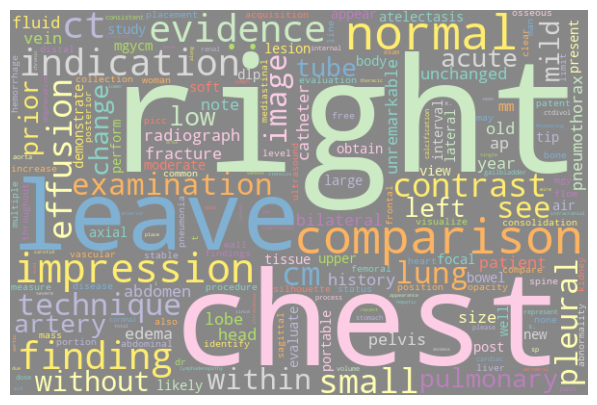

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
# import colourblind colours
from palettable.colorbrewer.qualitative import Set3_12

# excluded colours
exclude = ["#ff0000", "#00ff00", "#ffff00"]  # Red, Green, Yellow

# define colour func
def colour_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colour = None 
    while colour is None or colour in exclude:
        colour = Set3_12.colors[random_state.randint(len(Set3_12.colors))] 
    return tuple(colour)

# set reandom state
random_state = np.random.RandomState(42)

wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color="#878787",
    collocations=False, # for better visibility
    color_func=colour_func,
    random_state=random_state
    ).generate_from_frequencies(token_frequency.set_index("Token")["Frequency"])

# Create figure and axis
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [28]:
# applying topic modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation # method of fitting model

# create count vectorizer 
vectorizer = CountVectorizer() 

# fit and transform tokens
X = vectorizer.fit_transform(token_frequency["Token"])

# Init LDA Model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# fit model
lda.fit(X)

topics = dict()

# topics and top words
top_words_per_topic = 10
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-top_words_per_topic:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    topic_name = f"Topic {i + 1}"
    topics[topic_name] = top_words

print(topics)
        

{'Topic 1': ['the', 'recommended', 'disease', 'post', 'casting', 'band', 'thickening', 'loss', 'see', 'posterior'], 'Topic 2': ['uncertain', 'pericardium', 'in', 'placement', 'hemothorax', 'diameter', 'note', 'using', 'mmolkg', 'atelectasis'], 'Topic 3': ['there', 'no', 'normal', 'present', 'mgycm', 'identified', 'pneumonia', 'resolved', 'small', 'diaphragms'], 'Topic 4': ['structures', 'configuration', 'then', 'abnormalities', 'cc', 'visualized', 'if', 'unremarkable', 'at', 'parenchymal'], 'Topic 5': ['clear', 'contrast', 'no', 'coronal', 'fx', 'max', 'inadequately', 'may', 'orif', 'svc'], 'Topic 6': ['cm', 'there', 'narrowing', 'left', 'effusion', 'criteria', 'infarction', 'xmm', 'reposition', 'inch'], 'Topic 7': ['cm', 'study', 'malignancy', 'location', 'due', 'they', 'impression', 'multilevel', 'node', 'endplate'], 'Topic 8': ['mm', 'cm', 'roughly', 'mdctacquired', 'postsurgical', 'helical', 'axial', 'prior', 'approximately', 'welldefined'], 'Topic 9': ['this', 'technique', 'oral',

In [29]:
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(token_frequency["Token"])

# Apply LSA (Latent Semantic Analysis)
num_topics = 10
lsa = TruncatedSVD(n_components=num_topics)
lsa_result = lsa.fit_transform(X)

# dict to store
lsa_dict = dict()
for i, token in enumerate(token_frequency["Token"]):
    lsa_values = [lsa_result[i, j] for j in range(num_topics)]
    lsa_dict[token] = lsa_values

# convert to data frame
lsa_df = pd.DataFrame.from_dict(lsa_dict, orient="index", columns=[f"LSA{j + 1}" for j in range(num_topics)])

# visualise with heatmap using seaborn
import seaborn as sns

# visualise
# plt.figure(figsize=(100,100))
# sns.heatmap(lsa_df, cmap="coolwarm", annot = True, fmt=".2f")
# plt.title("LSA Results Heatmap")
# plt.xlabel("LSA Components")
# plt.ylabel("Tokens")
# plt.show()

# Broken

The code block below does not seem to run on my MacBook Air M1 (2021)

In [30]:
# # network graph
# import networkx as nx 
# # speed
# import concurrent.futures

# # create network graph
# G = nx.Graph()

# # add tokens to graph
# tokens = token_frequency["Token"]
# for token in tokens:
#     G.add_node(token)
    
# similarity_threshold = 0.4

# # add edges based on LSA results
# def add_edges(i, j, k):
#     similarity = abs(lsa_result[j, i] - lsa_result[k, i])
#     if similarity > similarity_threshold:
#         G.add_edge(tokens[j], tokens[k], weight=similarity)

# # ThreadPoolExecutor for parallel processing 
# with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
#     futures = []
#     for i in range(num_topics):
#         for j in range(len(tokens)):
#             for k in range(j + 1, len(tokens)):
#                 futures.append(executor.submit(add_edges, i, j, k))
#     # wait for all takss to comples
#     concurrent.futures.wait(futures)

# # visualise graph
# pos = nx.kamada_kawai_layout(G)
# plt.figure(figsize=(12,12))
# nx.draw(G, pos, with_labels=True, node_size = 50, font_size=10, font_colour="black")
# plt.show()